# PUNTO 1 | SISTEMA AUTÓNOMO 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dxdt(x, y):
    return 2*x - y

def dydt(x, y):
    return x + 2*y

In [3]:
t = np.linspace(0,10,100)
h = t[1] - t[0]
x0 = 1.0
y0 = 0.0
t0 = t[0]
tf = t[-1]

In [4]:
def RungeK4 (x0, y0, t0, tf, h):
    N = int((tf - t0) / h)
    t = np.linspace(t0, tf, N)
    x = np.zeros(N)
    y = np.zeros(N)
    
    x[0] = x0
    y[0] = y0

    for i in range(1, N):
        k1_x = dxdt(x[i-1], y[i-1])
        k1_y = dydt(x[i-1], y[i-1])

        k2_x = dxdt(x[i-1] + 0.5*k1_x*h, y[i-1] + 0.5*k1_y*h)
        k2_y = dydt(x[i-1] + 0.5*k1_x*h, y[i-1] + 0.5*k1_y*h)

        k3_x = dxdt(x[i-1] + 0.5*k2_x*h, y[i-1] + 0.5*k2_y*h)
        k3_y = dydt(x[i-1] + 0.5*k2_x*h, y[i-1] + 0.5*k2_y*h)

        k4_x = dxdt(x[i-1] + k3_x*h, y[i-1] + k3_y*h)
        k4_y = dydt(x[i-1] + k3_x*h, y[i-1] + k3_y*h)

        x[i] = x[i-1] + (k1_x + 2*k2_x + 2*k3_x + k4_x) * h / 6
        y[i] = y[i-1] + (k1_y + 2*k2_y + 2*k3_y + k4_y) * h / 6

    return t, x, y

In [5]:
t, x, y = RungeK4 (x0, y0, t0, tf, h)

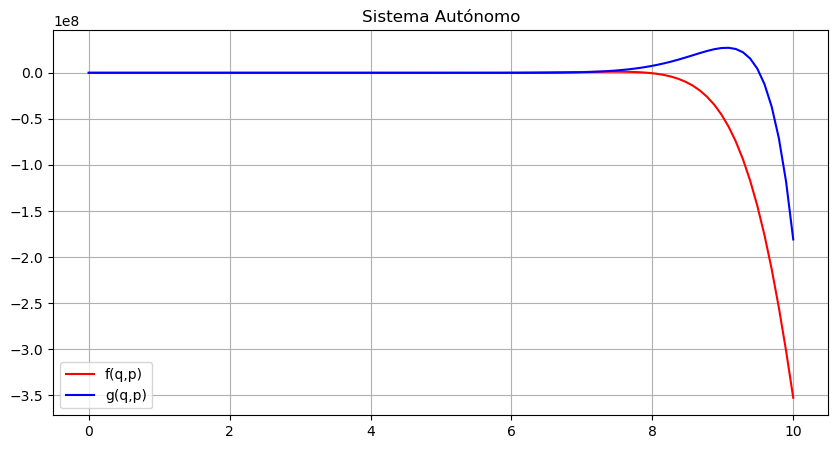

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='f(q,p)', color = 'red')
plt.plot(t, y, label='g(q,p)', color = 'blue')
plt.title('Sistema Autónomo')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
M = np.array([[2, -1],
              [1, 2]])

print("Matriz de estabilidad:")
print(M)

Matriz de estabilidad:
[[ 2 -1]
 [ 1  2]]


In [8]:
valores_p, vectores_p = np.linalg.eig(M)

print("Valores propios:")
for eigenvalue in valores_p:
    print(eigenvalue)

print("\nVectores propios:")
for i, eigenvector in enumerate(vectores_p.T):
    print(f"Vector propio {i+1}: {eigenvector}")

Valores propios:
(2+1j)
(2-1j)

Vectores propios:
Vector propio 1: [0.70710678+0.j         0.        -0.70710678j]
Vector propio 2: [0.70710678-0.j         0.        +0.70710678j]


In [9]:
b = np.array([0, 0])
puntos_c = np.linalg.solve(M, b)

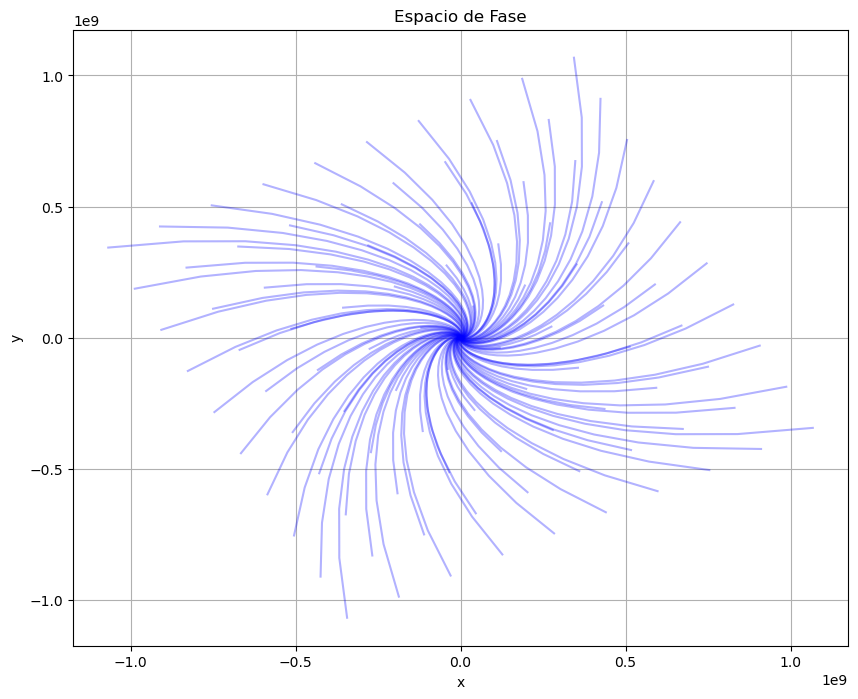

Puntos Críticos:
[0. 0.]


In [10]:
x0_values = np.linspace(-2, 2, 10)
y0_values = np.linspace(-2, 2, 10)

plt.figure(figsize=(10, 8))
for x0 in x0_values:
    for y0 in y0_values:
        t, x, y = RungeK4(x0, y0, t0, tf, h)
        plt.plot(x, y, color='b', alpha=0.3)

plt.title('Espacio de Fase')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

print('Puntos Críticos:')
print(puntos_c)